# 📊 Marketing Campaign Analysis and A/B Testing 

---

**Objective:** Analyze the effectiveness of 3 different marketing campaigns (A, B, C) across multiple stores and customer segments over 4 weeks.

**Key Questions:**
- Are the groups balanced in terms of location, store size, and historical performance?
- Which campaign has the highest conversion rate and revenue per customer?
- Are differences statistically significant?


## 1. Simulation Context

This dataset simulates a real-world A/B/C test scenario for a retail clothing chain that is launching a **New Collection**.

### 1.1. Objective
Evaluate the effectiveness of three different **marketing campaigns** across store locations, based on customer behavior and revenue performance.

### 1.2. Store Setup
- **150 stores** randomly assigned to one of three campaigns (**A**, **B**, **C**)
- Stratified by:
  - `store_location`: Urban / Suburban / Rural
  - `store_size_category`: Small / Medium / Large
- Store-level attributes include:
  - `avg_revenue_last_3_months`
  - `monthly_active_customers`

### 1.3. Customer Simulation
- Approx. **30,000 customers** interacted across **4 weeks**
- Each customer is assigned to only one store
- Only customers with **at least one purchase** are included
- Weekly records include:
  - `visit_count`, `products_ord`, `new_collection_items`, `revenue`
  - Demographics: `age`, `gender`
  - Promotion usage and gift received if eligible

### 1.4. Campaign Summary
- **Campaign A**: 5% discount on the total bill (requires at least one New Collection item)
- **Campaign B**: Free gift with the purchase of any New Collection item
- **Campaign C**: Email/SMS announcement + 10% discount via loyalty points or voucher

This dataset is designed to support analysis such as A/B testing, segmentation, behavioral trends, and campaign performance evaluation.


## 2. Dataset Description

This dataset simulates a 4-week A/B/C marketing experiment run by a retail clothing chain to evaluate the effectiveness of three different promotional strategies for a new product collection. Only customers who made at least one purchase are included.

Each customer is assigned to one store (with a fixed campaign) and the dataset includes rich demographic, store-level, and transactional information.

### 🧷 Columns Overview

| Column Name                  | Description                                                                 |
|-----------------------------|-----------------------------------------------------------------------------|
| `customer_id`               | Unique ID for each customer                                                 |
| `week`                      | Week number of the transaction (1 to 4)                                     |
| `store_id`                  | Unique ID of the store visited                                              |
| `campaign_group`            | Type of marketing campaign assigned to the store: A, B, or C                |
| `store_location`            | Store’s geographical location (`Urban`, `Suburban`, `Rural`)                |
| `store_size_category`       | Store size classification (`Small`, `Medium`, `Large`)                      |
| `avg_revenue_last_3_months` | Average revenue of the store prior to the campaign                          |
| `monthly_active_customers`  | Average number of monthly active customers at the store                     |
| `customer_segment`          | Type of customer (`New`, `Returning`)                                       |
| `age`                       | Age of the customer (only for purchasing customers)                         |
| `gender`                    | Gender of the customer (`Male`, `Female`)                                   |
| `visit_count`               | Number of visits resulting in a purchase during the week                    |
| `products_ord`              | Total number of products purchased                                          |
| `new_collection_items`      | Number of items from the new collection purchased                           |
| `other_products_ord`        | Number of products outside the new collection                               |
| `discount`                  | Discount rate applied (0%, 5%, or 10%)                                       |
| `gift_received`             | Gift received (if campaign B & eligible), else blank                        |
| `used_loyalty_or_voucher`   | Whether loyalty points/voucher was applied (for campaign C)                 |
| `promo_used`                | Whether any promo was used (gift or discount)                               |
| `revenue_before_discount`   | Original order value before applying discount                               |
| `revenue`                   | Final order revenue after discount                                          |


## 3. Load libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

sns.set(style='whitegrid')

In [13]:
df = pd.read_csv('ab_marketing_campaign_dataset.csv')
df.head(10)

,customer_id,week,store_id,campaign_group,store_location,store_size_category,avg_revenue_last_3_months,monthly_active_customers,customer_segment,age,...,visit_count,products_ord,new_collection_items,other_products_ord,discount,gift_received,used_loyalty_or_voucher,promo_used,revenue_before_discount,revenue
0,1,1,S038,A,Urban,Medium,123269.0,1010,Returning,18.0,...,1,3,2,1,0.05,NaN,False,Yes,111.638822,106.06
1,2,1,S141,C,Rural,Small,156279.0,2761,New,42.0,...,1,3,2,1,0.10,NaN,True,Yes,91.770396,82.59
2,3,1,S047,A,Urban,Medium,121745.0,1213,Returning,44.0,...,2,3,1,2,0.05,NaN,False,Yes,140.513985,133.49
3,4,1,S109,C,Urban,Medium,99444.0,542,Returning,28.0,...,2,4,3,1,0.00,NaN,False,No,159.671022,159.67
4,5,1,S015,B,Urban,Small,108126.0,1208,Returning,40.0,...,1,3,2,1,0.00,Keychain,False,Yes,128.749365,128.75
5,6,1,S136,A,Urban,Small,120315.0,2253,Returning,28.0,...,2,3,3,0,0.05,NaN,False,Yes,107.716919,102.33
6,7,1,S005,B,Urban,Large,69371.0,1239,New,43.0,...,1,4,0,4,0.00,NaN,False,No,61.312594,61.31
7,8,1,S047,A,Urban,Medium,121745.0,1213,Returning,40.0,...,1,3,2,1,0.05,NaN,False,Yes,107.092669,101.74
8,9,1,S068,B,Rural,Medium,135741.0,1270,Returning,36.0,...,1,2,2,0,0.00,Socks,False,Yes,88.791537,88.79
9,10,1,S076,A,Suburban,Small,105211.0,2948,Returning,31.0,...,1,1,1,0,0.05,NaN,False,Yes,43.238360,41.08


In [11]:
df.columns

Index(['customer_id', 'week', 'store_id', 'campaign_group', 'store_location',
       'store_size_category', 'avg_revenue_last_3_months',
       'monthly_active_customers', 'customer_segment', 'age', 'gender',
       'visit_count', 'products_ord', 'new_collection_items',
       'other_products_ord', 'discount', 'gift_received',
       'used_loyalty_or_voucher', 'promo_used', 'revenue_before_discount',
       'revenue'],
      dtype='object')

## 4. Group Balance Check

### Why Perform Group Balance Check?

Before comparing outcomes across different groups in an A/B/C test, it's essential to verify that the groups are balanced in terms of key characteristics. Otherwise, observed differences might be due to pre-existing differences — not the effect of the campaign.

#### Reasons to Perform Balance Check

1. **Ensure Fair Comparison**
   - If groups differ in demographics, location, or store size, any observed revenue differences might be biased.

2. **Support Valid Statistical Testing**
   - Most statistical tests assume that groups are similar in underlying characteristics.
   - Unbalanced groups can lead to misleading p-values (false positives or negatives).

3. **Detect Hidden Bias**
   - Example: Group B has mostly returning customers, Group C has mostly new customers → result is influenced by customer loyalty, not the campaign.

---

#### Steps

1. **Visual Checks**
   - Bar charts / Boxplots for variables like:
     - `store_location`, `store_size_category`
     - `age`, `gender`, `customer_segment`
     - `avg_revenue_last_3_months`, `monthly_active_customers`

2. **Statistical Tests**
   - **Chi-squared test** for categorical variables
   - **ANOVA / Kruskal-Wallis test** for numerical variables

3. **Document Any Imbalance**
   - If significant imbalance exists, consider:
     - Controlling for those variables in later analysis (e.g., regression)
     - Stratifying results or filtering

---

> A balance check helps ensure that any differences in campaign outcomes are **due to the campaign itself**, not underlying group biases.

### 4.1. Store balance checks

> Distribution of Customers per Campaign Group

In [20]:
df['campaign_group'].value_counts()

campaign_group
B    32955
A    32646
C    24399
Name: count, dtype: int64

- Groups A and B have a relatively balanced number of customers (~32k).
- Group C is significantly lower (~24k), a difference of more than 8,000 customers (~25%) compared to A/B → can affect the analysis → let's see

> Store Location Distribution by Campaign

In [19]:
pd.crosstab(df['campaign_group'], df['store_location'])

store_location,Rural,Suburban,Urban
campaign_group,,,
A,2334,11085,19227
B,8259,12114,12582
C,7860,7134,9405


- Group A is concentrated in Urban (city).

- Group B and C are more balanced in all 3 regions.

- Uneven distribution between regions of campaign A compared to B and C, especially A lacks Rural presence like B and C → can cause revenue bias.

> Store Size Category Distribution by Campaign

In [17]:
pd.crosstab(df['campaign_group'], df['store_size_category'])

store_size_category,Large,Medium,Small
campaign_group,,,
A,6429,16260,9957
B,7068,18186,7701
C,5613,10254,8532


- The distribution and size distribution ratios among groups were generally relatively even.

> Baseline Revenue Distribution

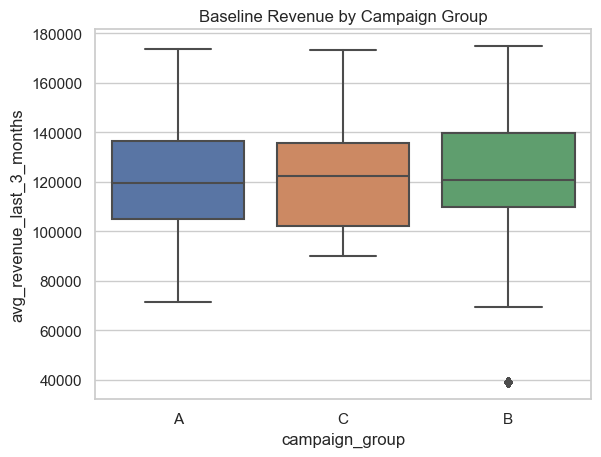

In [18]:
# Distribution of baseline revenue and customer demographics
sns.boxplot(x='campaign_group', y='avg_revenue_last_3_months', data=df)
plt.title('Baseline Revenue by Campaign Group')
plt.show()

- The medians of the three groups are quite similar (~125,000)

- The distributions are also quite similar in terms of width and outliers → no serious differences.

=> This is a good sign, showing that the baseline revenue between the groups is quite balanced.

### 4.2. Demographic checks + Chi-Square

> Gender Distribution per Campaign

In [26]:
# Count distribution
gender_ct = pd.crosstab(df['campaign_group'], df['gender'])
display(gender_ct)

# Chi-square test
from scipy.stats import chi2_contingency
chi2_gender = chi2_contingency(gender_ct)
print(f"Chi-square p-value (Gender vs Campaign): {chi2_gender[1]:.4f}")

gender,Female,Male
campaign_group,,
A,16358,16288
B,16290,16665
C,12131,12268


Chi-square p-value (Gender vs Campaign): 0.2214


- Each group has approximately the same number of men and women (no more than 400 people difference).

- The gender ratio between the groups is relatively even.

- Group C has fewer guests, but the male/female ratio is still balanced.

- p-value = 0.2214 > 0.05

→ There is no statistical evidence to conclude that gender distribution is significantly different between campaign groups A, B, C.

> Customer Segment Distribution per Campaign

In [25]:
# Count distribution
segment_ct = pd.crosstab(df['campaign_group'], df['customer_segment'])
display(segment_ct)

# Chi-square test
chi2_seg = chi2_contingency(segment_ct)
print(f"Chi-square p-value (Customer Segment vs Campaign): {chi2_seg[1]:.4f}")

customer_segment,New,Returning
campaign_group,,
A,3254,29392
B,3278,29677
C,2417,21982


Chi-square p-value (Customer Segment vs Campaign): 0.9707


- The New rate is about ~10% in all 3 groups.

- Groups A, B, C all have relatively small differences in the number of new/returning customers.

- Overall, the groups are very balanced.

- p-value = 0.9707 is very high (> 0.05)

→ There is no statistical evidence to conclude that the distribution of new/returning customers is different between groups.

>  Age Distribution (Visual + ANOVA)

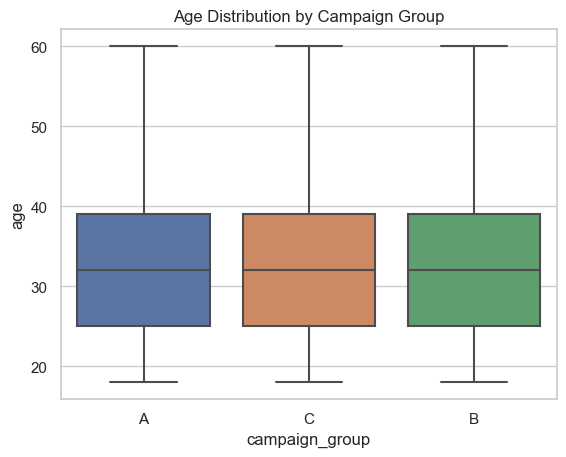

ANOVA p-value (Age vs Campaign): 0.5328


In [28]:
# Boxplot
sns.boxplot(x='campaign_group', y='age', data=df)
plt.title("Age Distribution by Campaign Group")
plt.show()

# ANOVA test
from scipy.stats import f_oneway
group_A = df[df['campaign_group'] == 'A']['age']
group_B = df[df['campaign_group'] == 'B']['age']
group_C = df[df['campaign_group'] == 'C']['age']
anova_age = f_oneway(group_A, group_B, group_C)
print(f"ANOVA p-value (Age vs Campaign): {anova_age.pvalue:.4f}")

- The age groups in all 3 campaigns (A, B, C) have almost the same distribution shape:

- The average age is around 30–35

- There are no clear differences in median, quartiles or outliers

→ The age distribution seems to be even between groups

- p-value = 0.5328 > 0.05

→ There is no statistical evidence that the average age differs between campaign groups.

> This is an extremely important step to ensure that the A/B test results are reliable and not biased by background factors.

## 5. Behavioral Analysis

### Why Behavioral Analysis?

#### Reasons

- Understand how customers interact with your marketing campaigns.

- Discover behavioral patterns that can influence test results.

- Help you design better metrics.

---

#### Outline

- Analyze how customers interact with your store and campaigns.

- Identify purchasing patterns, frequency of visits, and purchasing behavior for new collections vs. other products.

- Distinguish groups of customers with prominent behaviors (e.g., heavy spenders, low engagement...)

### 5.1. Total Revenue by Campaign

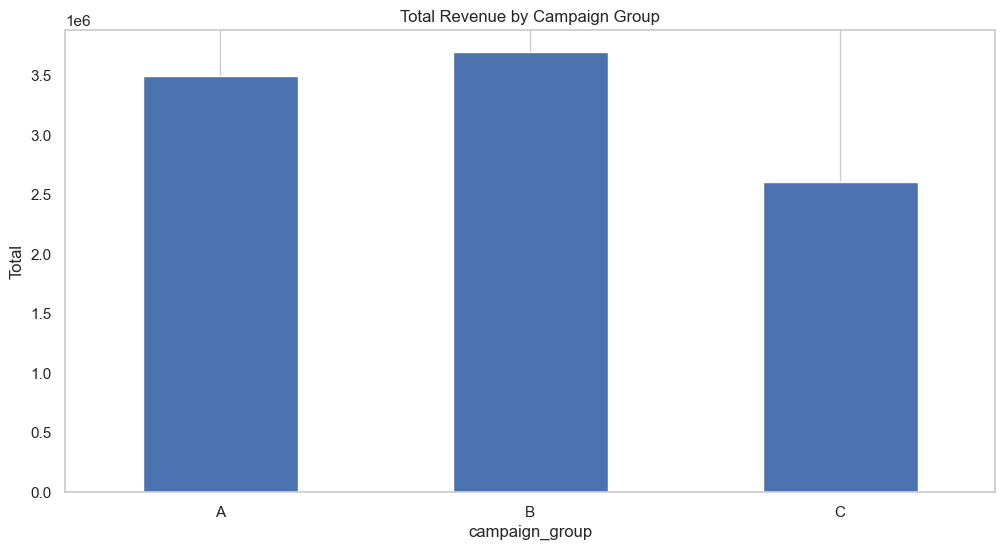

In [37]:
# Total orders and revenue per campaign
df.groupby('campaign_group')['revenue'].sum().plot(kind='bar', figsize=(12,6))
plt.title('Total Revenue by Campaign Group')
plt.ylabel('Total')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

### 5.2. Revenue by Campaign & Customer Segment

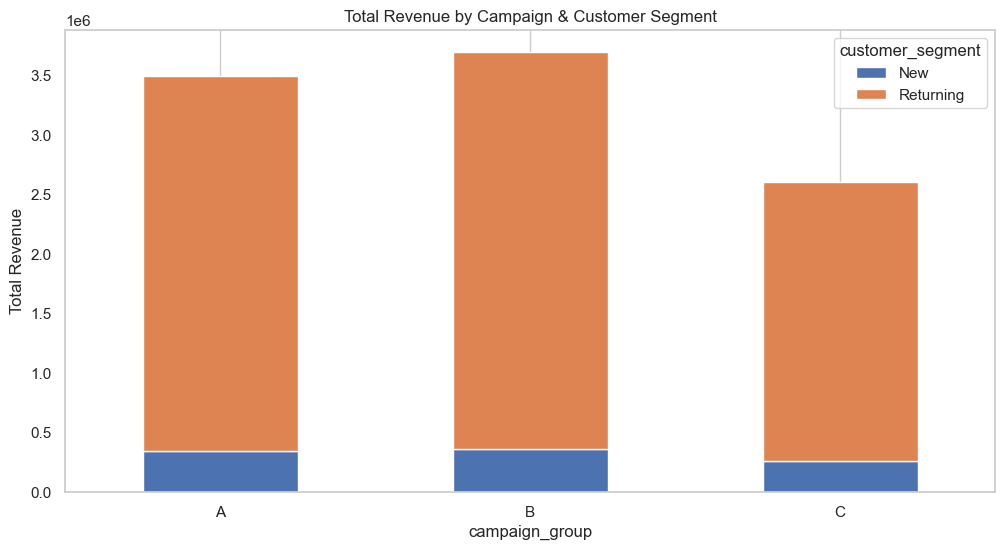

In [40]:
# Grouped by campaign and customer segment
pivot_seg = df.pivot_table(index='campaign_group', columns='customer_segment',
                           values='revenue', aggfunc='sum')

pivot_seg.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Total Revenue by Campaign & Customer Segment')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


### 5.3. Revenue by Campaign & Gender

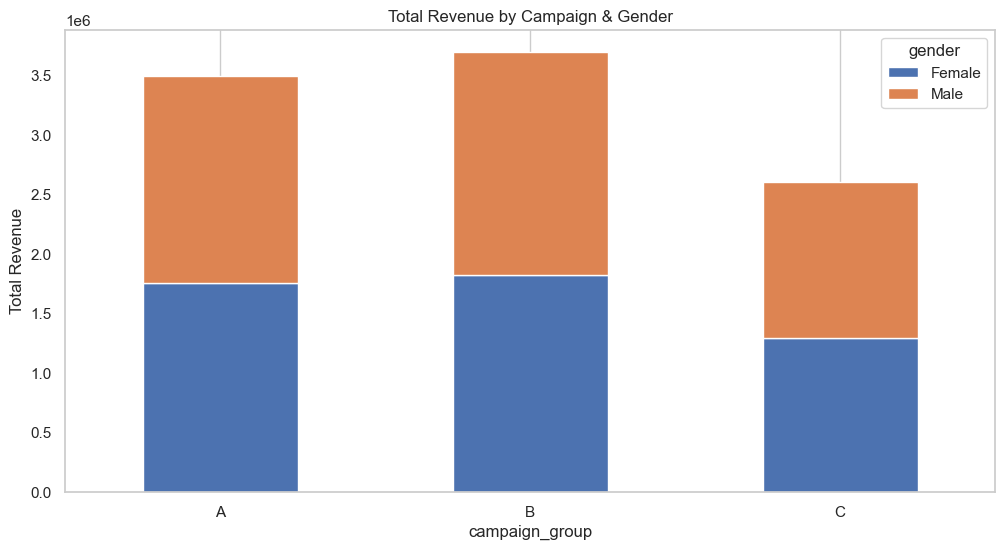

In [44]:
pivot_gender = df.pivot_table(index='campaign_group', columns='gender',
                              values='revenue', aggfunc='sum')

pivot_gender.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Total Revenue by Campaign & Gender')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


### 5.4. Revenue by Campaign & Age Group

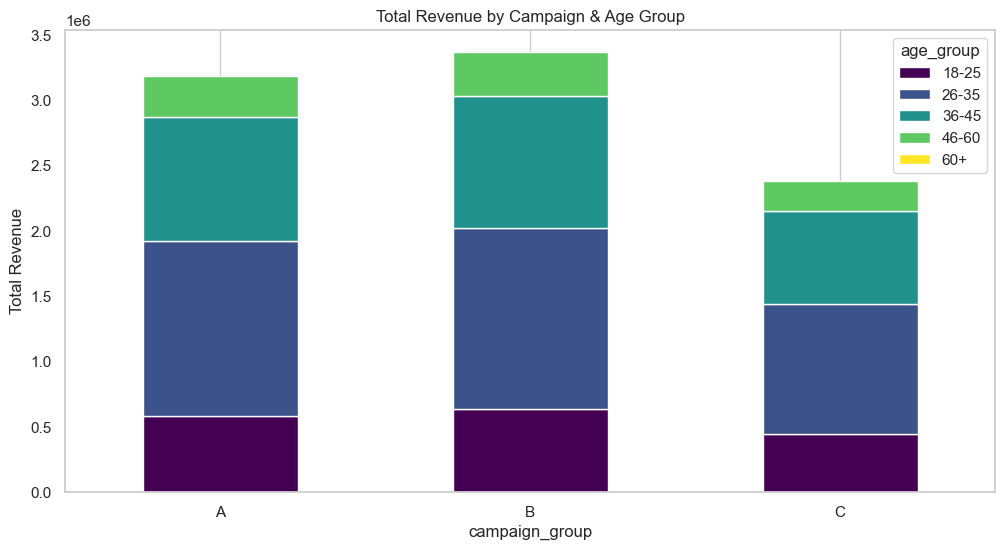

In [46]:
# Binning age
df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 60, 100],
                         labels=['18-25', '26-35', '36-45', '46-60', '60+'])

pivot_age = df.pivot_table(index='campaign_group', columns='age_group',
                           values='revenue', aggfunc='sum')

pivot_age.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title('Total Revenue by Campaign & Age Group')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


### 5.5. Revenue by Campaign & Promo Used

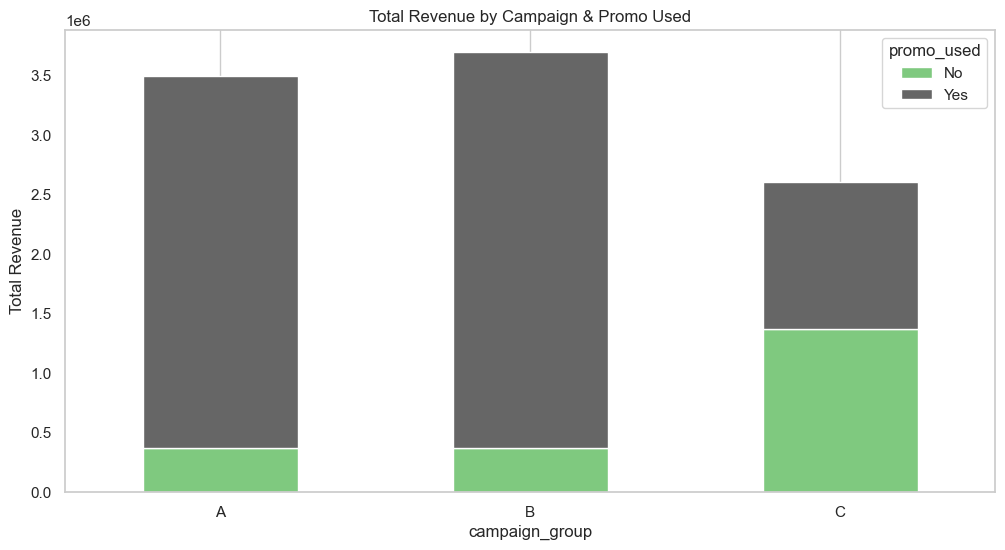

In [48]:
pivot_promo = df.pivot_table(index='campaign_group', columns='promo_used',
                             values='revenue', aggfunc='sum')

pivot_promo.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Accent')
plt.title('Total Revenue by Campaign & Promo Used')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

### 5.6. Total New Collection Items by Campaign

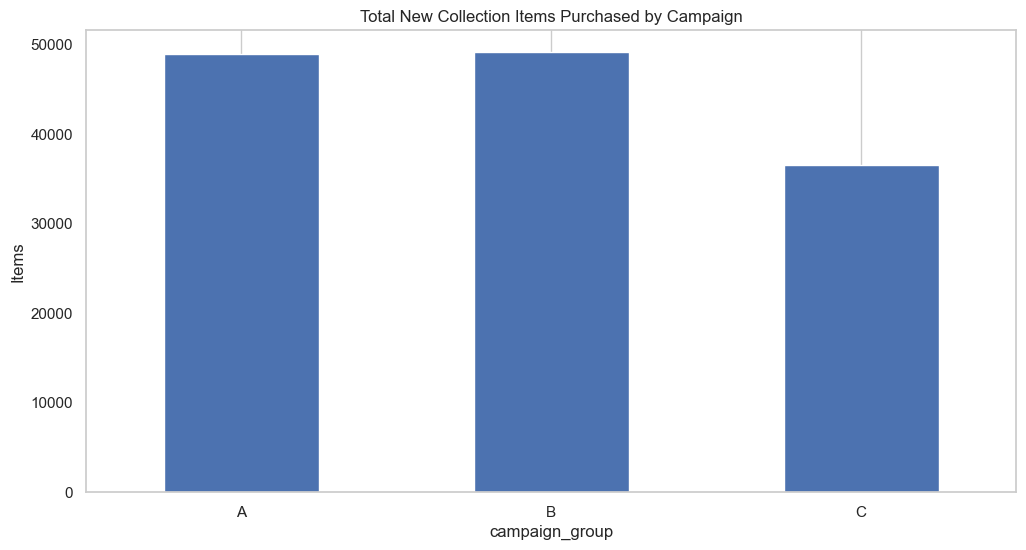

In [51]:
df.groupby('campaign_group')['new_collection_items'].sum().plot(kind='bar', figsize=(12,6))
plt.title('Total New Collection Items Purchased by Campaign')
plt.ylabel('Items')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

### 5.7. Average Revenue per Product

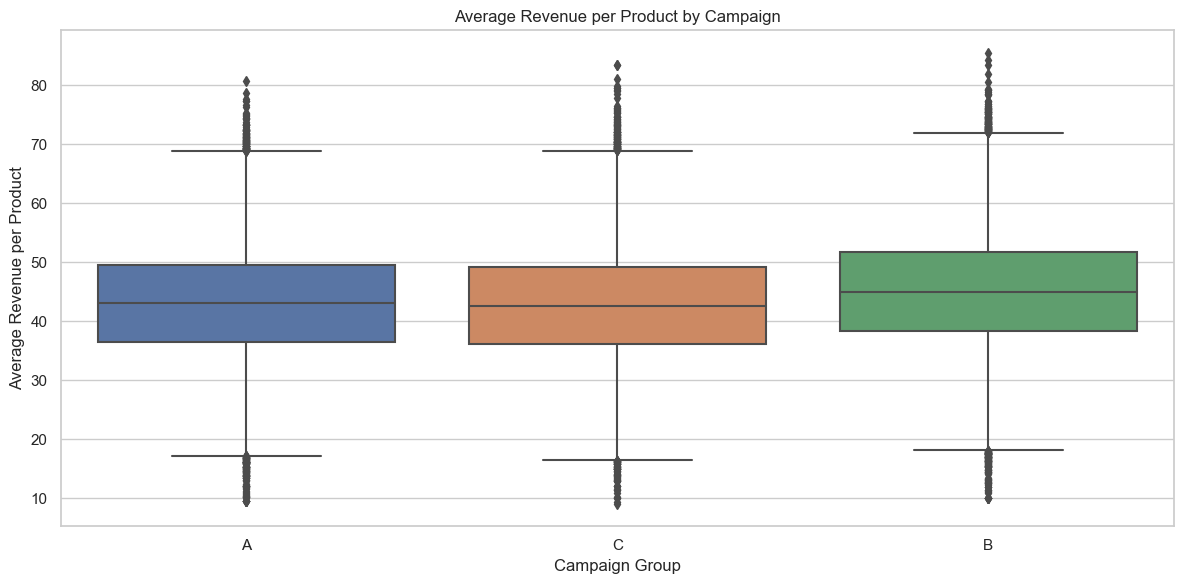

In [65]:
df['avg_revenue_per_product'] = df['revenue'] / df['products_ord']

plt.figure(figsize=(12, 6))
sns.boxplot(x='campaign_group', y='avg_revenue_per_product', data=df)
plt.title('Average Revenue per Product by Campaign')
plt.ylabel('Average Revenue per Product')
plt.xlabel('Campaign Group')
plt.tight_layout()
plt.show()

### 5.8. Visit-to-Purchase Ratio

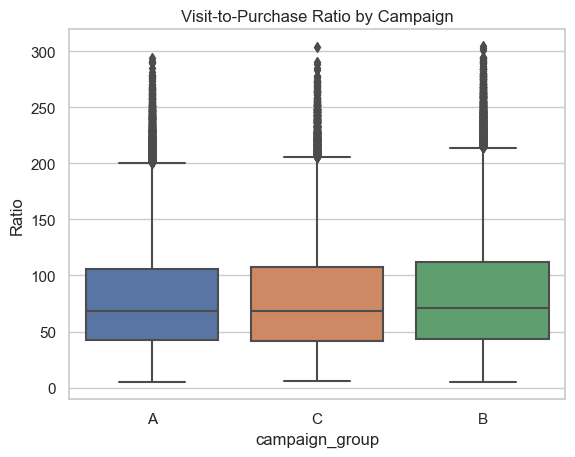

In [72]:
df['visit_to_revenue_ratio'] = df['revenue'] / df['visit_count']

sns.boxplot(x='campaign_group', y='visit_to_revenue_ratio', data=df)
plt.title('Visit-to-Purchase Ratio by Campaign')
plt.ylabel('Ratio')
plt.show()

### 5.9. Engagement with New Collection (Using Revenue)

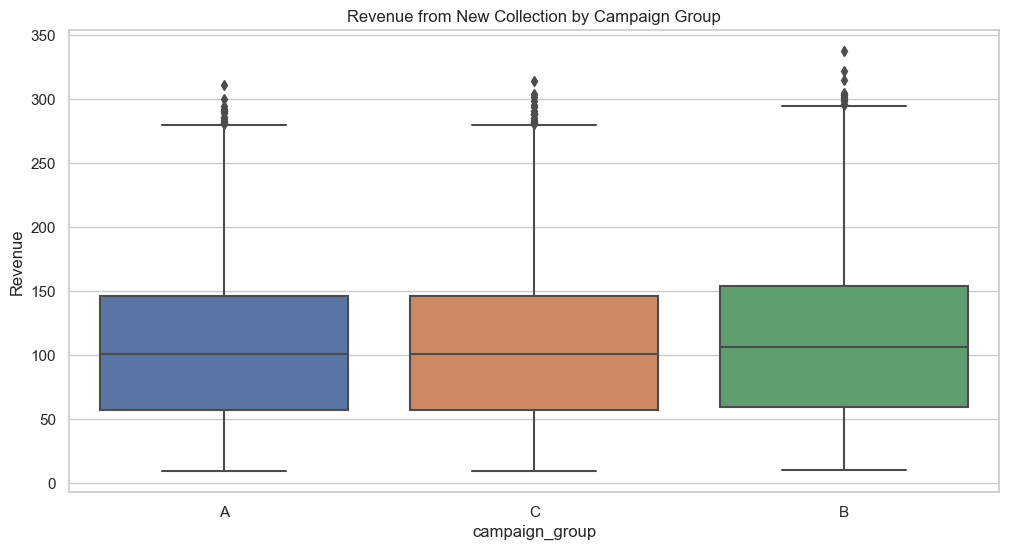

In [74]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='campaign_group', y='revenue', data=df)
plt.title('Revenue from New Collection by Campaign Group')
plt.ylabel('Revenue')
plt.show()

## 🧪 Statistical Testing

In [ ]:
# ANOVA test for revenue
anova_model = ols('revenue ~ campaign_group', data=df).fit()
sm.stats.anova_lm(anova_model, typ=2)

In [ ]:
# Chi-square test for purchase rate
contingency_table = pd.crosstab(df['campaign_group'], df['purchase'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi2 = {chi2:.2f}, p = {p:.4f}")

## 📌 Conclusion & Recommendation
- Summarize key insights from the analysis
- Which campaign is most effective?
- Any recommendations for future rollouts?
